In [36]:

import tensorflow as tf
import pandas as pd
from wordcloud import WordCloud

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional, Dense, Dropout


In [51]:
df=pd.read_csv('data/train.csv')

In [52]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [53]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [54]:
df.shape

(20800, 5)

In [55]:
df[['title', 'author']] = df[['title', 'author']].fillna(value = 'Missing')
df = df.dropna()
print(df.isnull().sum())
print(df.shape)

id        0
title     0
author    0
text      0
label     0
dtype: int64
(20761, 5)


In [56]:
length = []
[length.append(len(str(text))) for text in df['text']]
df['length'] = length
df.head()

,id,title,author,text,label,length
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,4160
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,938


In [57]:
min(df['length']), max(df['length']), round(sum(df['length'])/len(df['length']))

(1, 142961, 4553)

In [58]:
voc_size = 4500

In [59]:
# since minimum length of news is 1. We can conclude that there are some outliers present in the dataset
df = df.drop(df['text'][df['length'] < 25].index, axis = 0)

In [60]:
df.shape

(20616, 6)

In [61]:
# Wordcloud

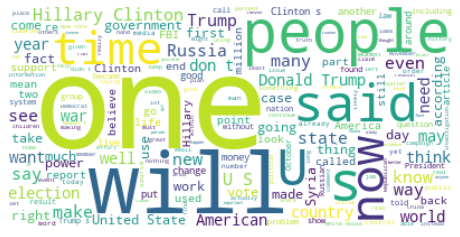

In [62]:
import matplotlib.pyplot as plt

#for fake news

news_text = " ".join([x for x in df.text[df.label==1]])

wordcloud = WordCloud(background_color='white').generate(news_text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

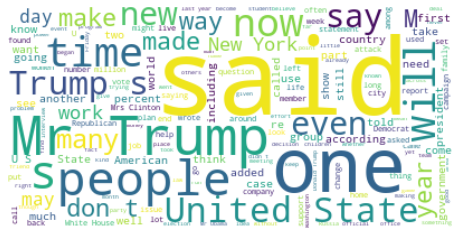

In [63]:
#for real news

news_text = " ".join([x for x in df.text[df.label==0]])

wordcloud = WordCloud(background_color='white').generate(news_text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [64]:
print('Real news count : ', df["label"].value_counts()[0])
print('Fake news count : ', df["label"].value_counts()[1])

Real news count :  10385
Fake news count :  10231


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target Count')

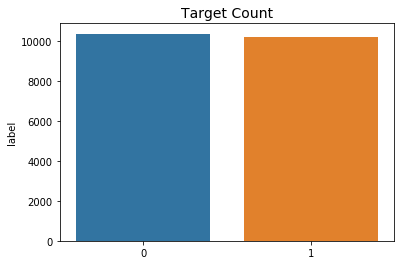

In [65]:
import seaborn as sns

label = df["label"].value_counts()
sns.barplot(label.index, label)
plt.title('Target Count', fontsize=14)

In [66]:
X=df.drop('label',axis=1)
y=df['label']

In [67]:
X.shape

(20616, 5)

In [68]:
y.shape

(20616,)

In [73]:
messages=X.copy()

In [74]:
messages['concatenated_text'] = messages['title'] +  ' ' + messages['text']

In [75]:
messages['concatenated_text'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointi

In [76]:
messages.reset_index(inplace=True)

In [77]:
import nltk
import re
from nltk.corpus import stopwords

In [78]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['concatenated_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [30]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 


In [31]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  550 4236 2987]
 [   0    0    0 ...  180  554  295]
 [   0    0    0 ... 4197 2665 1449]
 ...
 [   0    0    0 ... 3208 4446  346]
 [   0    0    0 ... 1890  306 3725]
 [   0    0    0 ...  175 4338 3777]]


In [32]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4081,
       3287, 2078,   24, 3437, 3883,  447,  550, 4236, 2987])

In [43]:
## Creating model
# embedding_vector_features=40
# model=Sequential()
# model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
# model.add(LSTM(100))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# print(model.summary())


embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 20, 40)            180000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               112800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 293,001
Trainable params: 293,001
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
len(embedded_docs),y.shape

(20616, (20616,))

In [45]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [46]:
X_final.shape,y_final.shape

((20616, 20), (20616,))

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [49]:

history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=64, verbose=1)

Train on 16492 samples, validate on 4124 samples
Epoch 1/50
16492/16492 [==============================] - 5s 332us/sample - loss: 0.1272 - accuracy: 0.9557 - val_loss: 0.2099 - val_accuracy: 0.9275
Epoch 2/50
16492/16492 [==============================] - 6s 388us/sample - loss: 0.0899 - accuracy: 0.9674 - val_loss: 0.2499 - val_accuracy: 0.9275
Epoch 3/50
16492/16492 [==============================] - 6s 363us/sample - loss: 0.0632 - accuracy: 0.9775 - val_loss: 0.2953 - val_accuracy: 0.9275
Epoch 4/50
16492/16492 [==============================] - 6s 358us/sample - loss: 0.0454 - accuracy: 0.9844 - val_loss: 0.3432 - val_accuracy: 0.9226
Epoch 5/50
16492/16492 [==============================] - 6s 380us/sample - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.3762 - val_accuracy: 0.9217
Epoch 6/50
16492/16492 [==============================] - 7s 401us/sample - loss: 0.0208 - accuracy: 0.9929 - val_loss: 0.4030 - val_accuracy: 0.9195
Epoch 7/50
16492/16492 [===========================

KeyboardInterrupt: 

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Adding Dropout 

In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Performance Metrics And Accuracy

In [ ]:
y_pred=model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
text='Manchester United won the Primere League ninteen times ,they are not performing upto their standards nowadays'
lst=[]
text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
text=text.lower()
text=text.strip()
text=re.sub('Re:','Retweet',text)
text_token=[t for t in word_tokenize(text) if t not in stopwords.words('english')]
text=' '.join(text_token)
text=text.strip()
lst.append(text)


user_one_hot = [one_hot(words , vocab_size) for words in lst]
user_one_hot

sent_length=20
emb_text=pad_sequences(user_one_hot,sent_length,truncating='post',padding='post')

emb_text

model.predict_classes(emb_text)